**CONTINUACION ANALISIS PRECIOS HISTORICOS**<br>
**_Por Carlos Crespo Elizondo, MSF_**<br>
MF-013 Análisis de Inversión<br>
Maestría de Finanzas, Facultad de Economía, UANL<br>
16 de octubre, 2019

**EL CODIGO DE LA SEMANA PASADA**<br>
Copia el siguiente código y pégalo en Jupyter.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import plt
plt.style.use('seaborn')


empresas = ['ac.csv','alfaa.csv','alpeka.csv','alsea.csv',
            'amxl.csv','asurb.csv','bimboa.csv','bolsaa.csv','cemexcpo.csv',
            'elektra.csv','femsaubd.csv','gapb.csv','gcarsoa1.csv',
            'gmexicob.csv','grumab.csv','ienova.csv','kimbera.csv',
            'kofubl.csv','labb.csv','livepolc1.csv','megacpo.csv','omab.csv',
            'orbia.csv','penoles.csv','pinfra.csv','tlevisacpo.csv',
            'walmex.csv']

#Creación del rango de fechas:
fecha_inicial = '2014-1-1'
fecha_final = '2019-10-4'

rango_fechas = pd.date_range(fecha_inicial, fecha_final)


#Creación del DF
precios_cierre = pd.DataFrame(index = rango_fechas)


#Llenado del DF
for empresa in empresas:
    
    nombre, terminacion = empresa.split('.')
    url = 'http://bit.ly/oncedos-{}'.format(nombre)
    
    df = pd.read_csv(url, skiprows=6, index_col=0, parse_dates = True,
                dayfirst = True, usecols = ['Date', 'PX_LAST'])
    
    df.sort_index(inplace = True)
    
    precios_cierre = precios_cierre.join(df['PX_LAST'])
    precios_cierre.rename(columns = {'PX_LAST':nombre}, inplace = True)
        
precios_cierre.dropna(inplace = True)


#Calculo de los precios normalizados
precios_normalizados = (precios_cierre / precios_cierre.iloc[0, :]) - 1

#Gráficas
#precios_cierre.plot(figsize = (12,8));
#precios_normalizados.plot(figsize=(12,8));

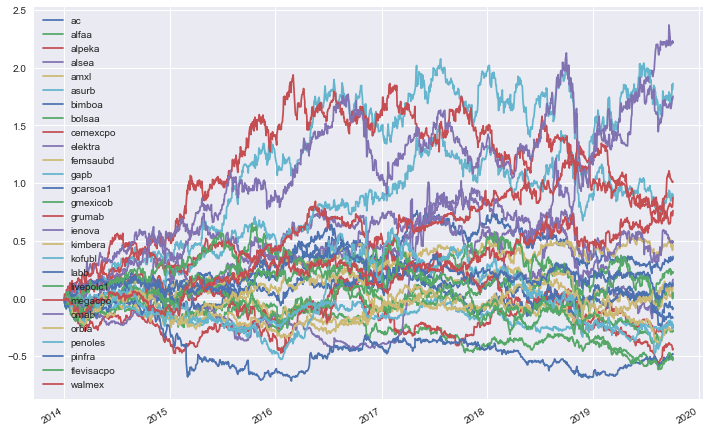

In [2]:
precios_normalizados.plot(figsize=(12,8));

In [3]:
retornos = np.log(precios_cierre / precios_cierre.shift(1))

In [4]:
retornos.head()

,ac,alfaa,alpeka,alsea,amxl,asurb,bimboa,bolsaa,cemexcpo,elektra,...,kofubl,labb,livepolc1,megacpo,omab,orbia,penoles,pinfra,tlevisacpo,walmex
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,0.002741,0.014161,-0.019146,-0.002195,0.000707,-0.037668,-0.009542,0.001975,-0.000620,-0.022524,...,0.002369,-0.039799,-0.014518,-0.004065,0.004139,-0.010053,-0.002592,-0.019806,-0.001022,-0.005100
2014-01-06,-0.019220,-0.016358,-0.009712,0.018149,-0.007810,-0.041239,0.001036,-0.017917,0.004560,-0.009135,...,-0.022050,-0.032610,-0.028709,0.029434,0.007999,0.001670,0.001769,-0.021463,-0.007445,-0.012103
2014-01-07,0.001901,-0.006066,0.011092,0.018768,-0.007153,0.038312,-0.011455,0.021528,0.000000,0.026301,...,0.024094,0.011375,-0.005309,0.005915,-0.003192,0.006347,-0.003939,0.012554,0.017116,0.016005
2014-01-08,-0.007370,-0.004990,0.023843,-0.009459,-0.015190,0.015834,-0.030305,-0.016518,0.013786,-0.017779,...,-0.017643,-0.014313,0.001470,-0.016296,0.010902,0.022069,-0.021214,0.015426,0.004297,-0.014788


In [5]:
retornos.dropna(inplace = True)
retornos.head()

,ac,alfaa,alpeka,alsea,amxl,asurb,bimboa,bolsaa,cemexcpo,elektra,...,kofubl,labb,livepolc1,megacpo,omab,orbia,penoles,pinfra,tlevisacpo,walmex
2014-01-03,0.002741,0.014161,-0.019146,-0.002195,0.000707,-0.037668,-0.009542,0.001975,-0.000620,-0.022524,...,0.002369,-0.039799,-0.014518,-0.004065,0.004139,-0.010053,-0.002592,-0.019806,-0.001022,-0.005100
2014-01-06,-0.019220,-0.016358,-0.009712,0.018149,-0.007810,-0.041239,0.001036,-0.017917,0.004560,-0.009135,...,-0.022050,-0.032610,-0.028709,0.029434,0.007999,0.001670,0.001769,-0.021463,-0.007445,-0.012103
2014-01-07,0.001901,-0.006066,0.011092,0.018768,-0.007153,0.038312,-0.011455,0.021528,0.000000,0.026301,...,0.024094,0.011375,-0.005309,0.005915,-0.003192,0.006347,-0.003939,0.012554,0.017116,0.016005
2014-01-08,-0.007370,-0.004990,0.023843,-0.009459,-0.015190,0.015834,-0.030305,-0.016518,0.013786,-0.017779,...,-0.017643,-0.014313,0.001470,-0.016296,0.010902,0.022069,-0.021214,0.015426,0.004297,-0.014788
2014-01-09,-0.005627,-0.005295,-0.024533,0.001425,-0.010257,-0.026180,-0.021553,-0.032157,0.032625,-0.002667,...,-0.003644,-0.019009,-0.004838,-0.004450,0.004283,-0.008950,-0.002190,0.013733,0.003148,0.010585


In [7]:
valores = retornos.sum()

In [10]:
np.exp(valores) - 1

ac            0.365190
alfaa        -0.521668
alpeka       -0.244158
alsea         0.166667
amxl          0.053786
asurb         0.901045
bimboa       -0.081622
bolsaa        0.233278
cemexcpo     -0.434810
elektra       2.224221
femsaubd      0.468576
gapb          1.863856
gcarsoa1     -0.166739
gmexicob      0.051080
grumab        1.014399
ienova        0.496695
kimbera       0.120307
kofubl       -0.224245
labb         -0.482128
livepolc1    -0.279060
megacpo       0.876719
omab          1.753456
orbia        -0.263478
penoles      -0.223315
pinfra        0.135821
tlevisacpo   -0.506643
walmex        0.763016
dtype: float64

In [11]:
from matplotlib.backends.backend_pdf import PdfPages
import datetime
